In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np
import librosa as lr
from librosa import display

In [2]:
audio, sample_rate = lr.load('../raw_data/sample_audio/Alburger, Mark, The Twelve Fingers, Op.8, ZUmCV1zUuBw.wav')

time = np.arange(0, len(audio)) / sample_rate

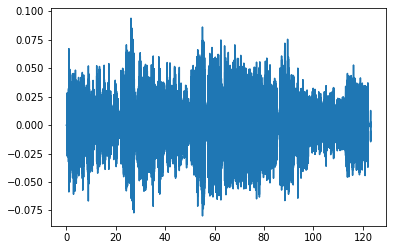

In [4]:
plt.plot(time, audio);

In [5]:
audio_transformed = np.abs(lr.stft(audio))
D = lr.stft(audio)
audio_transformed
D

array([[-1.3237500e-02+0.00000000e+00j, -2.6852725e-02+0.00000000e+00j,
        -3.1189540e-02+0.00000000e+00j, ...,
         3.5094839e-02+0.00000000e+00j,  4.1368034e-02+0.00000000e+00j,
        -2.4932821e-01+0.00000000e+00j],
       [ 5.5407220e-03-9.30204336e-03j,  1.6242234e-02-3.96106858e-03j,
         1.5680259e-02-2.36351771e-05j, ...,
        -8.5610161e-03+4.28684950e-02j, -1.0360374e-01-2.02877969e-02j,
         1.7611524e-01-2.70625681e-01j],
       [ 1.9443705e-03+5.43113286e-03j, -2.8948304e-03-8.24670482e-04j,
         4.0706596e-05-4.26917468e-05j, ...,
        -1.8525850e-02-2.40227152e-02j,  1.9337786e-02-4.14190851e-02j,
         4.3595888e-02+3.33392441e-01j],
       ...,
       [-1.5060114e-06+1.84670611e-07j,  7.0784120e-07-9.15065570e-08j,
        -7.1007128e-10+3.93850536e-10j, ...,
        -7.9880941e-08+1.08708676e-07j,  7.0177128e-07-9.10775043e-07j,
        -4.0380628e-06+7.36166021e-06j],
       [ 1.5071760e-06-9.28849104e-08j, -4.6479869e-08-7.07410095e-0

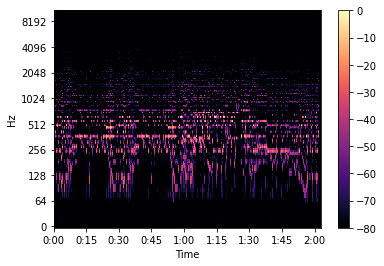

In [13]:
log_power = lr.amplitude_to_db(D**2, ref = np.max)

lr.display.specshow(log_power, x_axis = 'time', y_axis='log')
plt.colorbar()

In [25]:
C = lr.cqt(audio)

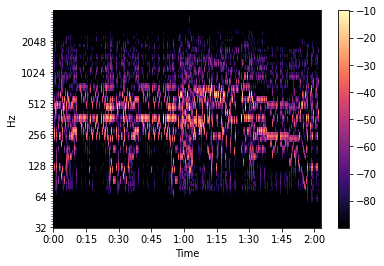

In [26]:
log_power = lr.amplitude_to_db(C**2)

lr.display.specshow(log_power, x_axis = 'time', y_axis='cqt_hz')
plt.colorbar()


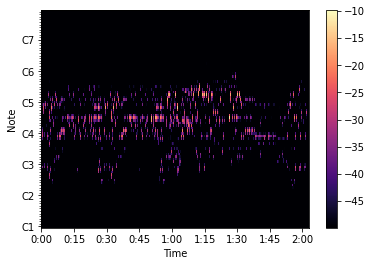

In [27]:
log_power = lr.amplitude_to_db(C**2, top_db = 40)

lr.display.specshow(log_power, x_axis = 'time', y_axis='cqt_note')
plt.colorbar()


In [31]:
new_audio = lr.icqt(C)

In [32]:
print(len(audio), len(new_audio), sample_rate)

2714912 2714624 22050


In [33]:
sf.write('processed-output3.wav', new_audio, sample_rate)